In [1]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
from ipynotifyer import notifyOnComplete as nf


Populating the interactive namespace from numpy and matplotlib


In [2]:
cr = pd.read_csv('data/processed.csv',index_col=0)[['Yexp','Pexp',
                                                    'gender','income',
                                                    'city_y', 'ind', 'reg']]

In [7]:
# one more thing
cr.city_y.replace('Kyiv','Kiev', inplace=1)
cr.gender.replace('unknown', np.nan, inplace=1)

In [12]:
cr.head(3)

,Yexp,Pexp,gender,income,city_y,ind,reg
0,1.55,5,male,1560000,NaN,design,NaN
1,0.25,4,male,960000,StPetersburg,design,StPetersburg
2,0.25,4,male,960000,StPetersburg,design,StPetersburg


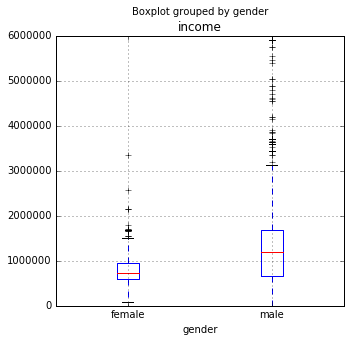

In [10]:
cr[cr.income <= 6000000 ].boxplot(column='income', by='gender' , figsize=(5,5))

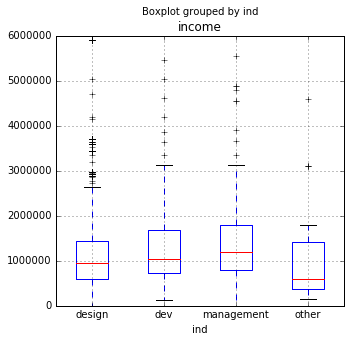

In [11]:
cr[cr.income <= 6000000 ].boxplot(column='income', by='ind' , figsize=(5,5));

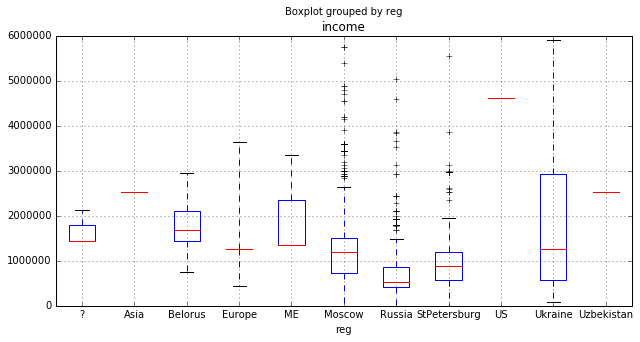

In [14]:
cr[cr.income <= 6000000 ].boxplot(column='income', by='reg' , figsize=(10,5));

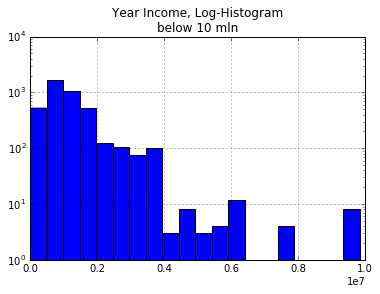

In [23]:
cr[cr.income <= 10000000 ].income.hist(bins=20, log=1)
plt.title('Year Income, Log-Histogram\nbelow 10 mln')

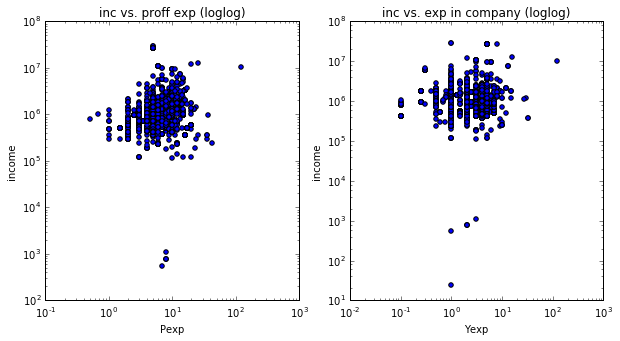

In [36]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

cr[cr.Pexp>0].plot(kind='scatter', x='Pexp', y='income', loglog=1, ax=axes[0], title='inc vs. proff exp (loglog)')
cr[cr.Yexp>0].plot(kind='scatter', x='Yexp', y='income', loglog=1, ax=axes[1], title='inc vs. exp in company (loglog)')

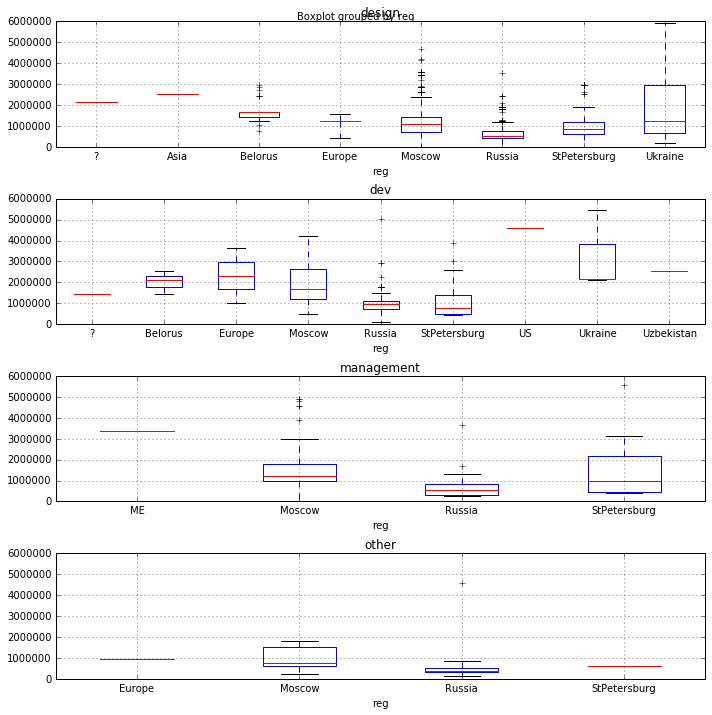

In [46]:
fig, axes = plt.subplots(4,1, figsize=(10,10), sharey=True)

for i, (name, g) in enumerate(cr.groupby('ind')):
    
    g[g.income <= 6000000 ].boxplot( ax = axes[i], column='income', by='reg' , figsize=(10,5))
    axes[i].set_title(name)

plt.tight_layout()